In [20]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
from collections import Counter
import numpy as np
import pandas as pd
import string

from afinn import Afinn

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
sns.set_style('whitegrid')

In [2]:
content = pd.read_pickle('data/content.pkl')

In [3]:
## Flatten all sentences into a single array, also remove START & STOP.
text_flat = [word for line in content['tokens'] for word in line \
             if word not in ['START_SYMBOL','STOP_SYMBOL']]

In [4]:
## Remove stopwords and punctuations., 
stop_words = stopwords.words('english') + list(string.punctuation)

text_stop = [word.lower() for word in text_flat \
            if (word.lower() not in stop_words and len(word) > 3)]

## Now we stem the words, and only keep the set.
ps = PorterStemmer()
text_stem = Counter([ps.stem(word) for word in text_stop])

{0: (0.96570549992954025, 0.96724336988785686, 0.96808919836493101), 1: (0.8429834772558773, 0.9091118854634902, 0.94548250997767724), 2: (0.65490198135375977, 0.81437909603118896, 0.89411765336990356), 3: (0.40853519825374379, 0.66874281097860899, 0.81453288302702065), 4: (0.21568628619698915, 0.51418686964932614, 0.73287198824041033), 5: (0.11003460811779779, 0.36262976334375496, 0.6226067069698783), -2: (0.9686274528503418, 0.71764707565307617, 0.60000002384185791), -5: (0.64613611733212184, 0.077508652034927808, 0.16032295674085617), -4: (0.78938870920854454, 0.27681661441045646, 0.25490197013406191), -3: (0.89919262423234825, 0.51441754605255874, 0.40792005143913568), -1: (0.9884659753126257, 0.87604768135968369, 0.8099192731520708)}


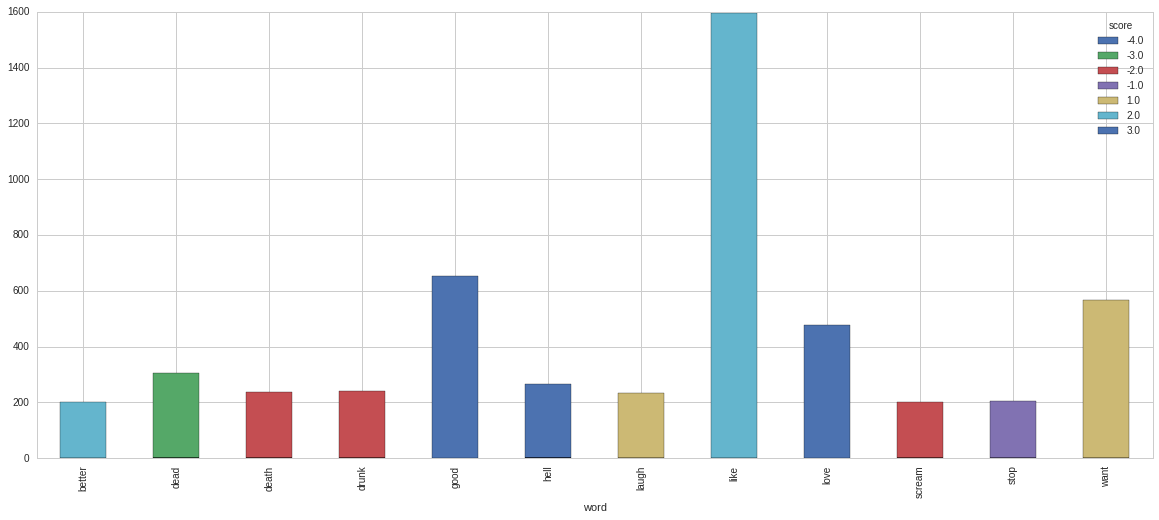

In [76]:
## Word sentiment scorer.
afinn = Afinn()
commons = pd.DataFrame({'word': [word[0] for word in text_stem.most_common(100)],
                        'count': [word[1] for word in text_stem.most_common(100)],
                        'score' : [afinn.score(word[0]) for word in text_stem.most_common(100)]})


## Color palette.
palette = sns.color_palette("RdBu", n_colors=11)
pal = {palette.index(col)-5: col for col in palette}

print pal

commons[commons['score'] != 0]\
    .pivot(index='word', columns='score', values='count')\
    .plot.bar(stacked=True)

In [56]:
afinn.